## Author: Shriansh Jena

# Exploratory Data Analysis - Retail

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

### Fetching Data

In [2]:
pwd

'C:\\Users\\Admin'

In [3]:
file_path = 'C:\\Users\\Admin\\Downloads\\SampleSuperstore.csv'
df = pd.read_csv(file_path)

df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

### Interpreting Data

In [4]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Checking for missing values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# Checking for any duplicate rows in the dataset
df.duplicated().sum()

17

In [9]:
# Eliminating 17 duplicate rows to prevent errors in subsequent calculations.
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(9977, 13)

In [11]:
print(df['Country'].nunique())

1


In [12]:
df['Postal Code']

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9977, dtype: int64

There is just a single country, so it's preferable to exclude it. Additionally, since the postal code serves no purpose, dropping it is also advisable.

In [13]:
df = df.drop(['Country', 'Postal Code'], axis=1)

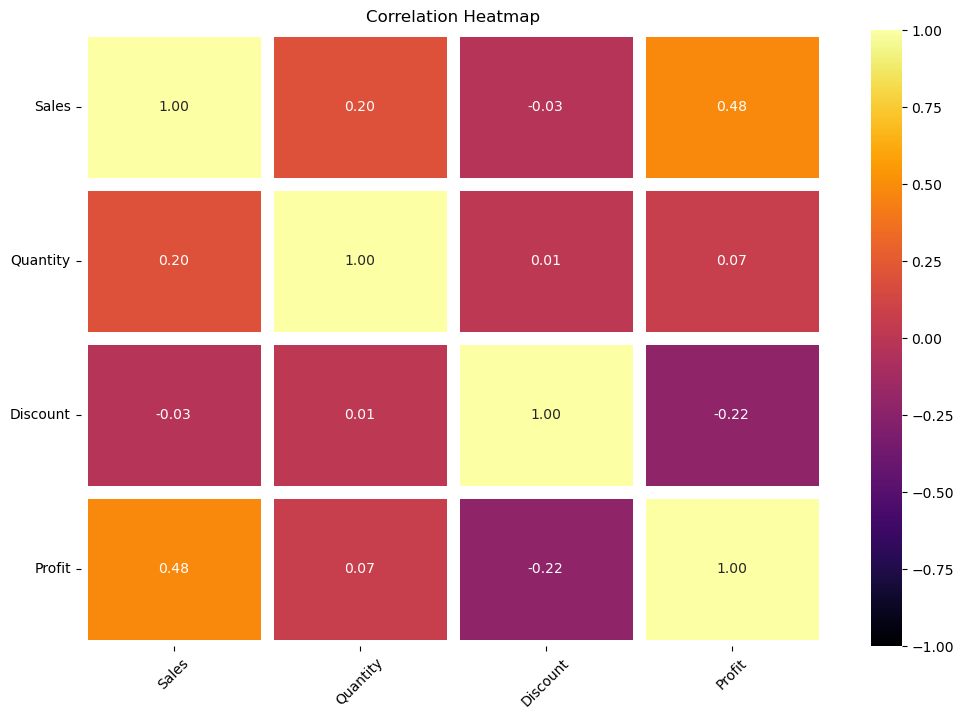

In [14]:
corr = df.corr()

# Creating heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="inferno",
    lw=8,
    linecolor="white",
    vmin=-1,
    vmax=1,
    fmt=".2f",
)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

### No significant correlations have been identified

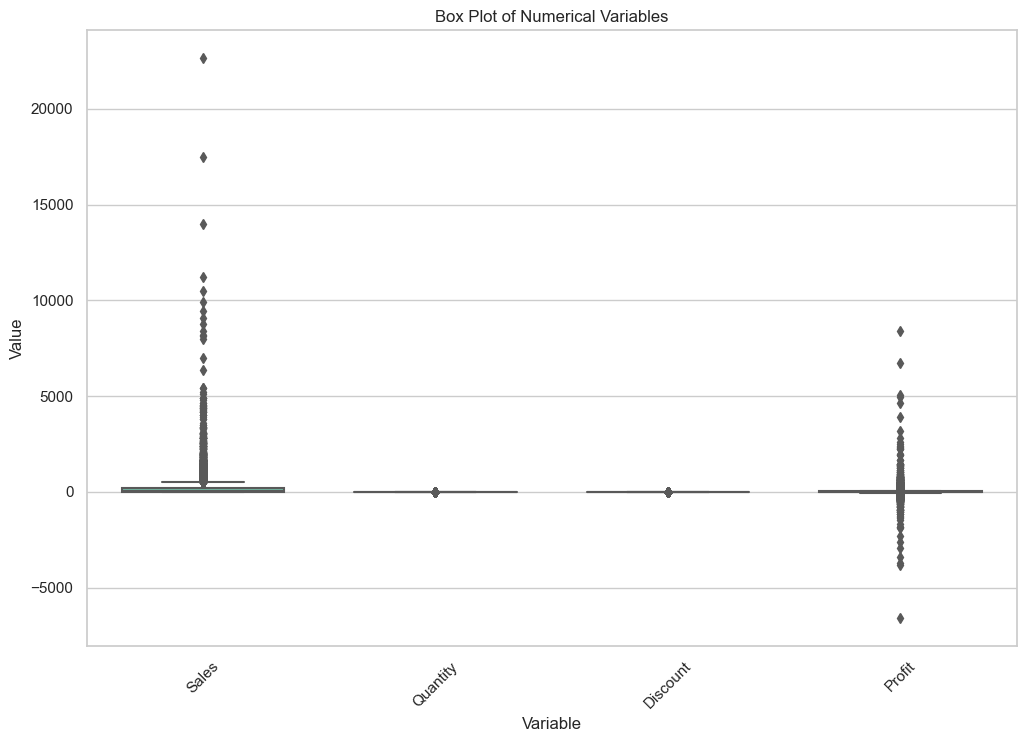

In [15]:
# Selecting numerical columns
df_con = df.select_dtypes(include=['number'])

plt.figure(figsize=[12, 8])
sns.set(style="whitegrid")

# Creating a box plot
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=0.7, palette="Set2")

plt.xlabel("Variable")
plt.ylabel("Value")
plt.title("Box Plot of Numerical Variables")

plt.xticks(rotation=45)

plt.show()

In [16]:
df_con.iplot(kind='box')

Based on the plot above, it's evident that there are outliers in both Sales and Profit. Since this dataset is extensive, we have the option to exclude rows with outliers to enhance our outcomes.

In [17]:
import plotly.express as px

def remove_outliers(dataset, k=3.33):
    ds = dataset.copy()
    for col in ds.select_dtypes(include=['int64', 'float64']).columns:
        mean = ds[col].mean()
        std = ds[col].std()
        lower_limit = mean - k * std
        upper_limit = mean + k * std
        ds = ds[(ds[col] >= lower_limit) & (ds[col] <= upper_limit)]
    return ds

# Removing outliers from the DataFrame
df_cleaned = remove_outliers(df, k=3.33)

# Creating a box plot using Plotly Express
fig = px.box(df_cleaned.select_dtypes(include=['int64', 'float64']), title='Box Plot After Outlier Removal')
fig.update_layout(width=800, height=500)

fig.show()

Consequently, the majority of outliers have been eliminated, and our dataset is now prepared for Exploratory Data Analysis.

## Exploratory Data Analysis

In [18]:
df_cleaned.shape

(9644, 11)

In [19]:
df_cleaned.head()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   
5  Standard Class   Consumer      Los Angeles  California   West   

          Category Sub-Category    Sales  Quantity  Discount    Profit  
0        Furniture    Bookcases  261.960         2       0.0   41.9136  
1        Furniture       Chairs  731.940         3       0.0  219.5820  
2  Office Supplies       Labels   14.620         2       0.0    6.8714  
4  Office Supplies      Storage   22.368         2       0.2    2.5164  
5        Furniture  Furnishings   48.860         7       0.0   14.1694

In [20]:
df_cleaned.describe()

Sales     Quantity     Discount       Profit
count  9644.000000  9644.000000  9644.000000  9644.000000
mean    164.504507     3.669017     0.154314    20.355402
std     270.306813     2.049868     0.204021    65.672241
min       0.444000     1.000000     0.000000  -363.528000
25%      16.520000     2.000000     0.000000     1.750725
50%      49.970000     3.000000     0.200000     8.352200
75%     187.760000     5.000000     0.200000    27.368775
max    2275.500000    11.000000     0.800000   407.128800

In [21]:
# Filtering for categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Printing unique entry counts for each categorical column
for col in categorical_columns:
    unique_entries = df_cleaned[col].nunique()
    print(f"Number of unique entries in {col} are {unique_entries}")
    print("=" * 50)

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


## Data Visualization

In [22]:
# Creating a bar chart for Region vs Sales
fig = px.bar(df_cleaned, x="Region", y="Sales", title="Region vs Sales", labels={"Region": "Region", "Sales": "Sales"})
fig.update_layout(xaxis_title="Region", yaxis_title="Sales")

fig.show()

The West region is in the forefront in terms of sales, with the East, Central, and South regions following in that order.

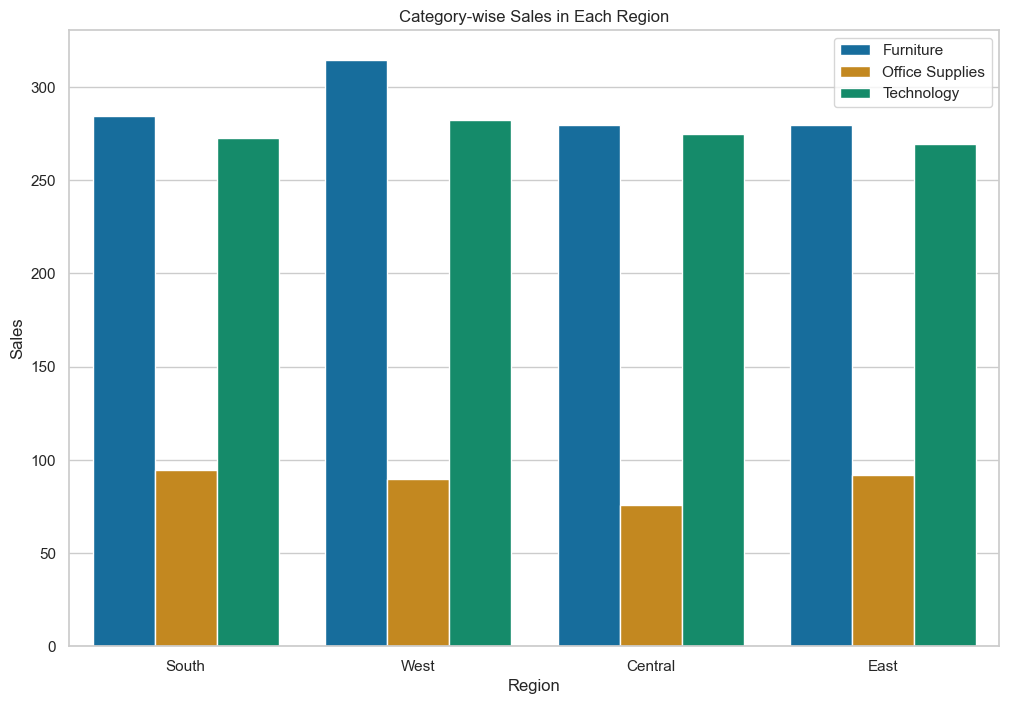

In [23]:
plt.figure(figsize=[12, 8])

# Creating a grouped barplot
sns.set_palette("colorblind")
sns.barplot(x="Region", y="Sales", hue="Category", data=df_cleaned, ci=None)

plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Category-wise Sales in Each Region")

legend = plt.legend(title="Category")
legend.set_title("Category")

plt.legend(loc="upper right")

plt.show()

Across all regions, 'Office Supplies' exhibit consistently low sales, while 'Furniture' and 'Technology' outperform significantly.

<Figure size 1200x600 with 0 Axes>

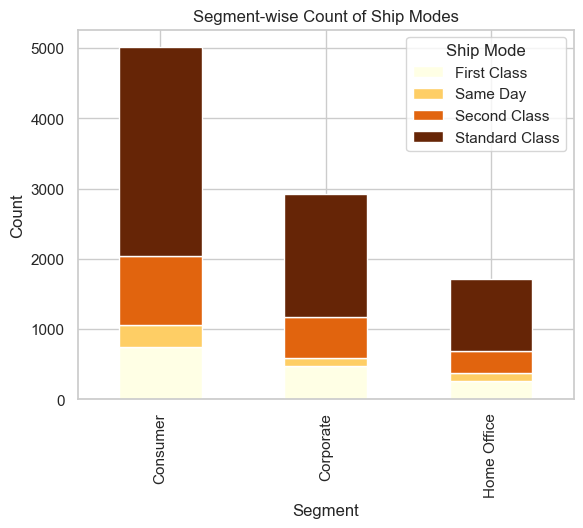

In [24]:
# Pivot the data to get counts by Segment and Ship Mode
pivot_data = df_cleaned.groupby(['Segment', 'Ship Mode']).size().unstack(fill_value=0)

plt.figure(figsize=[12, 6])
sns.set(style="whitegrid")

# Creating a stacked barplot
pivot_data.plot(kind='bar', stacked=True, colormap="YlOrBr")

plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Segment-wise Count of Ship Modes")

plt.legend(title="Ship Mode")
plt.show()

Not many unexpected findings here. In every scenario, the consumer count is the highest, and they typically favor the 'Standard Class' shipping option.

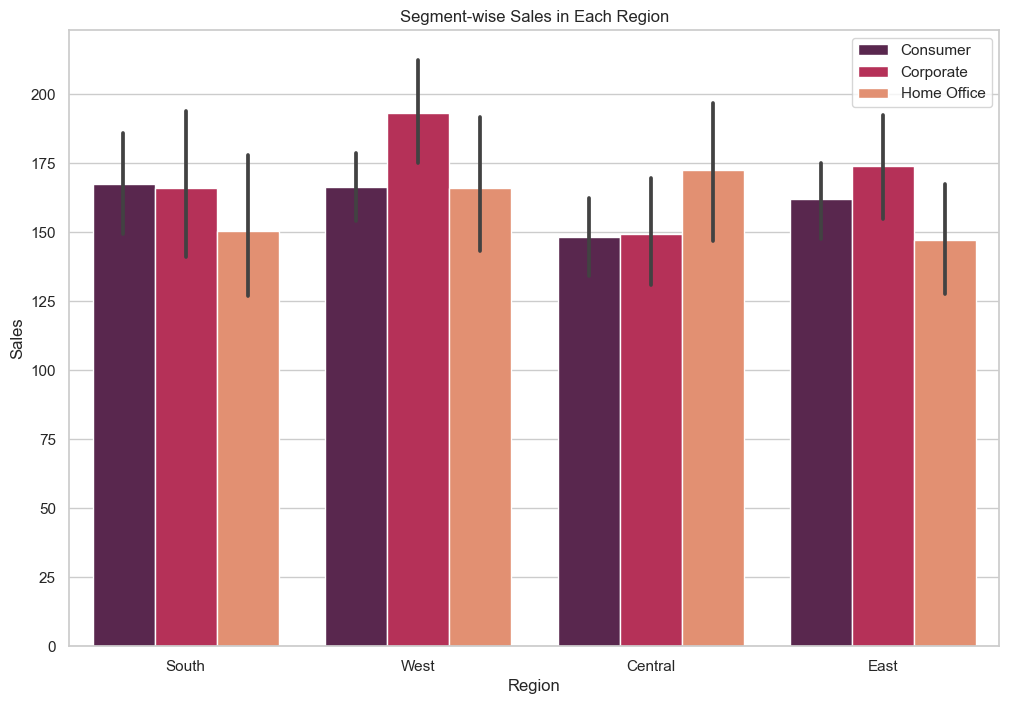

In [25]:
plt.figure(figsize=[12, 8])
sns.set(style="whitegrid")

# Creating a barplot with hue for Segment
sns.barplot(x="Region", y="Sales", hue="Segment", data=df_cleaned, palette="rocket")

plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Segment-wise Sales in Each Region")

legend = plt.legend(title="Segment")
legend.set_title("Segment")

plt.legend(loc="upper right")

plt.show()

When it comes to sales, there isn't a significant variation based on the segments within any region. On the whole, 'Corporate' leads slightly.

In [26]:
# Creating a grouped bar chart for Sub-Category vs. Sales
fig = px.bar(df_cleaned, x="Sub-Category", y="Sales", color="Sub-Category", title="Sub-Category vs. Sales",
             labels={"Sub-Category": "Sub_Category", "Sales": "Sales"},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_title="Sub_Category", yaxis_title="Sales")

fig.update_traces(marker_line_width=0.5, marker_line_color="black", opacity=0.7)

fig.show()

The sales of items like Chairs and Phones significantly surpass those of any other product.

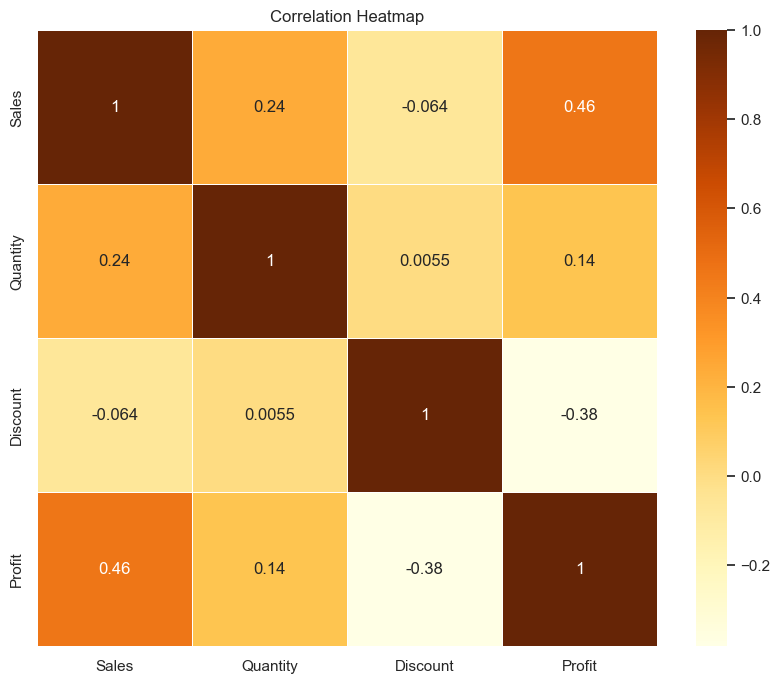

In [27]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

There are no significant or strong relationships observed among the columns in the dataset.

### Let's explore whether we can uncover intriguing insights using statistical analysis!

In [28]:
# Group the data by City
grouped = df_cleaned.groupby("City")

# Aggregate Sales per city
agg_sales = grouped['Sales'].sum().sort_values(ascending=False).reset_index()

# Displaying cities with the highest total sales
top_cities = agg_sales.head()
top_cities

City       Sales
0  New York City  153668.294
1    Los Angeles  130074.227
2  San Francisco   82027.969
3   Philadelphia   76310.019
4        Seattle   74912.064

The highest sales figures are found in New York City, with Los Angeles and San Francisco following closely behind.

In [29]:
# Group the data by City
grouped = df_cleaned.groupby("City")

# Aggregate Profit per city
agg_profit = grouped['Profit'].sum().sort_values(ascending=False).reset_index()

# Displaying cities with the highest total Profit
top_profit_cities = agg_profit.head()
top_profit_cities

City      Profit
0  New York City  31826.3136
1    Los Angeles  20959.4473
2        Seattle  13885.1971
3  San Francisco  13264.6279
4        Detroit   5562.7172

Likewise, the highest profit is generated in New York City, with Los Angeles and Seattle following as the next top earners.

In [30]:
# Group the data by City
grouped = df_cleaned.groupby("City")

# Aggregate Discount per city
agg_discount = grouped['Discount'].sum().sort_values(ascending=False).reset_index()

# Displaying cities with the highest aggregated Discount
top_discount_cities = agg_discount.head()
top_discount_cities

City  Discount
0  Philadelphia    166.90
1       Houston    136.42
2       Chicago    114.40
3        Dallas     55.18
4   Los Angeles     52.75

It's worth noting that Philadelphia has the highest total discount, followed by Houston and Chicago. One might expect them to also lead in the Sales and Profit categories.

In [31]:
# Group the data by City
grouped = df_cleaned.groupby("City")

# Calculate the Average Sales per city
average_sales = grouped['Sales'].mean().sort_values(ascending=False).reset_index()

# Displaying cities with the highest Average Sales
top_average_sales_cities = average_sales.head()
top_average_sales_cities

City     Sales
0      Cheyenne  1603.136
1       Burbank   983.595
2  Independence   839.430
3     Kissimmee   751.984
4  Saint Peters   697.160

In [32]:
# Displaying cities with the lowest Average Sales
bottom_average_sales_cities = average_sales.tail()
bottom_average_sales_cities

City  Sales
526  Ormond Beach  2.808
527     Pensacola  2.214
528       Jupiter  2.064
529        Elyria  1.824
530       Abilene  1.392

In [33]:
# Group the data by City
grouped = df_cleaned.groupby("City")

# Calculate the Average Profit per city
average_profit = grouped['Profit'].mean().sort_values(ascending=False).reset_index()

# Displaying cities with the highest Average Profit
top_average_profit_cities = average_profit.head()
top_average_profit_cities

City    Profit
0  Independence  218.2518
1    Bellingham  185.3425
2       Burbank  174.2721
3       Dubuque  159.2248
4   Saint Cloud  156.5380

In [34]:
# Display cities with the lowest Average Profit
average_profit.tail()

City      Profit
526    Tamarac  -87.974025
527      Tyler  -88.741720
528  Littleton  -98.801800
529     Normal -110.023200
530  Champaign -182.352000

In [35]:
# Group the data by City
grouped = df_cleaned.groupby("City")

# Calculating the Average Discount per city
average_discount = grouped['Discount'].mean().sort_values(ascending=False).reset_index()

# Displaying cities with the highest Average Discount
top_average_discount_cities = average_discount.head()
top_average_discount_cities

City  Discount
0      Deer Park       0.8
1        Abilene       0.8
2  Missouri City       0.8
3     Romeoville       0.8
4   Ormond Beach       0.7

In [36]:
average_discount.tail()

City  Discount
526      Montgomery       0.0
527        Moorhead       0.0
528      Morristown       0.0
529  Mount Pleasant       0.0
530        Aberdeen       0.0

Interestingly, when considering these average calculations, the cities that ranked highest in total Sales, total Profit, or total Discount do not hold the top positions. However, these average values provide an overall perspective of the situation.

In [37]:
# Cities having High Average Discounts
high_discount = average_discount[average_discount['Discount'] >= 0.7]

# Cities having low Average Discounts
low_discount = average_discount[average_discount['Discount'] == 0]

# Cities having High Average Sales
high_sales = average_sales[average_sales['Sales'] > 500]

# Cities having low Average Sales
low_sales = average_sales[average_sales['Sales'] < 50]

# Cities having High Average Profit
high_profit = average_profit[average_profit['Profit'] > 100]

# Cities having low Average profit
low_profit = average_profit[average_profit['Profit'] < 0]

# Cities with High-Average-Discounts but Low-Average-Sales
merged = pd.merge(high_discount, low_sales, on=['City'], how='inner')
merged

City  Discount  Sales
0      Deer Park       0.8  6.924
1        Abilene       0.8  1.392
2  Missouri City       0.8  6.370
3     Romeoville       0.8  8.952
4   Ormond Beach       0.7  2.808
5      Pensacola       0.7  2.214
6         Elyria       0.7  1.824

Key Insight 1: In this analysis, we've identified 7 cities where the company offers significant discounts, but sales are extremely low. Since discounts are already high, increasing them further wouldn't be productive. Therefore, our investment in these cities may not yield positive results.

In [38]:
# Cities with high Average Sales as well as Average Profit
merged2 = pd.merge(high_sales, high_profit, on=['City'], how='inner')
merged2

City        Sales     Profit
0      Cheyenne  1603.136000  100.19600
1       Burbank   983.595000  174.27210
2  Independence   839.430000  218.25180
3  Saint Peters   697.160000  146.40360
4        Norman   675.665000  134.76435
5    Twin Falls   574.403000  133.08245
6       Dubuque   562.433333  159.22480
7    Bellingham   562.310000  185.34250

Key Insight 2: The statistical findings presented here are quite encouraging. Across all 8 cities, both sales and profit figures are notably strong. Therefore, investing in these cities, particularly in terms of discounts and other business aspects, has the potential to further boost business growth. These cities can be referred to as "Hot-Spots."

In [39]:
# Cities where Average Discount is low but Average Sales is High
merged3 = pd.merge(low_discount, high_sales, on='City', how='inner')
merged3

City  Discount       Sales
0  Saint Peters       0.0  697.160000
1  Independence       0.0  839.430000
2       Dubuque       0.0  562.433333
3        Norman       0.0  675.665000
4       Burbank       0.0  983.595000

Key Insight 3: Remarkably, these 5 cities are achieving impressive average sales even without any discounts (0% discount). Therefore, if we allocate more investments to these cities, substantial sales and profits can be generated. These cities can be aptly referred to as the "Dark-Horses."

In [40]:
# Cities with high Average sales but low Average profit
merged4 = pd.merge(high_sales, low_profit, on='City', how='inner')
merged4

City    Sales    Profit
0  Richardson  644.232 -12.24465

Key Insight 4: In the city of Richardson, significant sales are being generated, but the company is experiencing losses. Therefore, it may be advisable to redirect focus away from this city or investigate the underlying reasons for the loss.

In [41]:
# Cities with high Average discount but low Average profit
merged5 = pd.merge(high_discount, low_profit, on='City', how='inner')
merged5

City  Discount   Profit
0      Deer Park       0.8 -10.3860
1        Abilene       0.8  -3.7584
2  Missouri City       0.8  -9.5550
3     Romeoville       0.8 -14.7708
4   Ormond Beach       0.7  -1.9656
5      Pensacola       0.7  -1.4760
6      Littleton       0.7 -98.8018
7         Elyria       0.7  -1.3984

Key Insight 5: Among the 8 cities listed above, where the highest average discounts are offered, the business is incurring losses. To address this situation, there needs to be a strong focus on identifying and rectifying the issues in these cities. Alternatively, consideration should be given to withdrawing the high discounts in order to offset the losses.

In [42]:
# Cities with low Average discount but High Average profit
merged6 = pd.merge(low_discount, high_profit, on='City', how='inner')
merged6

City  Discount      Profit
0    Saint Cloud       0.0  156.538000
1      Vacaville       0.0  110.052800
2   Saint Peters       0.0  146.403600
3   Independence       0.0  218.251800
4        Kenosha       0.0  114.230311
5        Dubuque       0.0  159.224800
6         Edmond       0.0  121.551950
7      Greenwood       0.0  117.933050
8   Broken Arrow       0.0  115.104520
9         Norman       0.0  134.764350
10      Muskogee       0.0  110.649150
11       Burbank       0.0  174.272100

Key Insight 6: These are the 12 cities where the company does not offer any discounts, yet they are generating a substantial amount of profit. Therefore, it's essential to prioritize and invest further in these profitable hotspots with extra care.

### Now, let's explore additional visualizations related to profit

In [43]:
# Creating a horizontal bar chart for State vs. Profit
fig = px.bar(df_cleaned, x="Profit", y="State", title="States vs. Profit", labels={"State": "State", "Profit": "Profit"},
             orientation="h", color="State", text="Profit")

fig.update_layout(yaxis_title="State", xaxis_title="Profit")
fig.update_traces(marker_line_width=0.5, marker_line_color="black", opacity=0.7, textposition="outside")

fig.show()

The chart illustrates that the states of 'California,' 'New York,' and 'Washington' are leading in terms of profit generation. Conversely, states like 'Texas', 'Pennsylvania', 'Illinois' and 'Ohio' are experiencing losses. Therefore, it is crucial to direct attention and efforts towards these states that are facing profitability challenges.

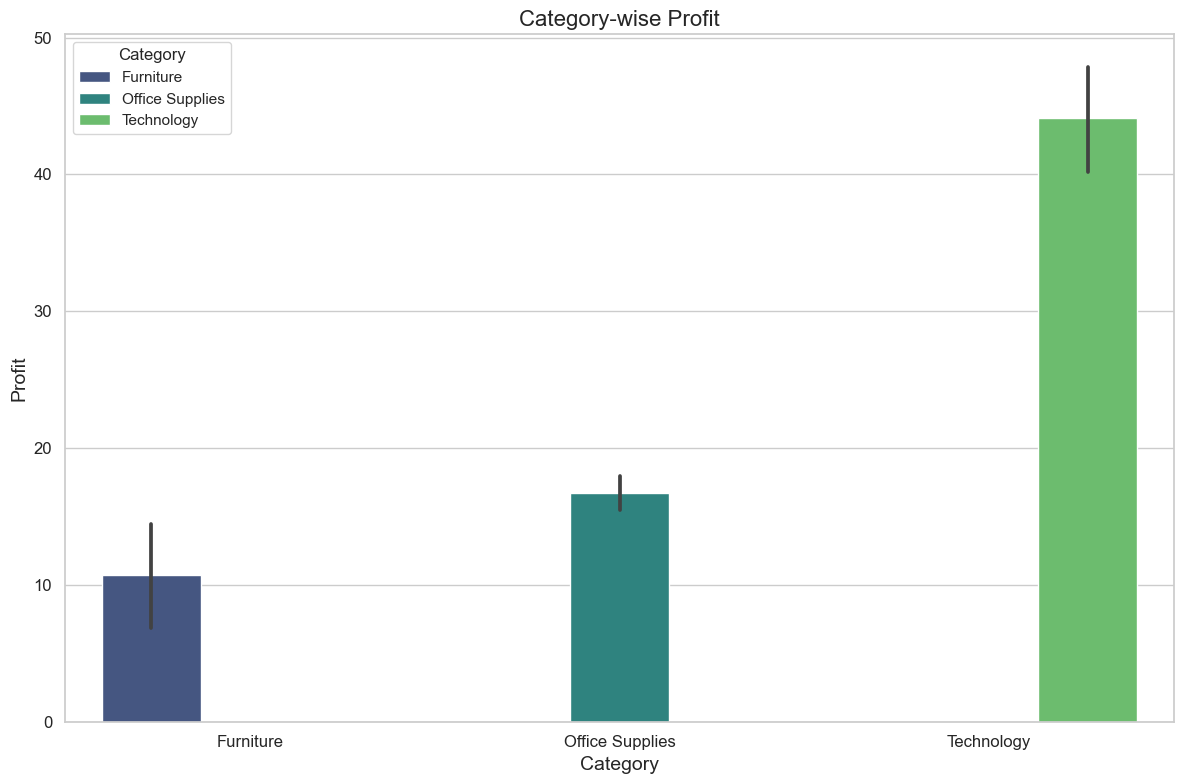

In [44]:
plt.figure(figsize=[12, 8])
sns.set(style="whitegrid")

# Creating a grouped barplot for Category vs. Profit
sns.barplot(x="Category", y="Profit", hue="Category", data=df_cleaned, palette="viridis")

plt.xlabel("Category", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.title("Category-wise Profit", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Category")

plt.tight_layout()
plt.show()

The 'Technology' category generates the highest profit, with 'Furniture' trailing behind in the list.

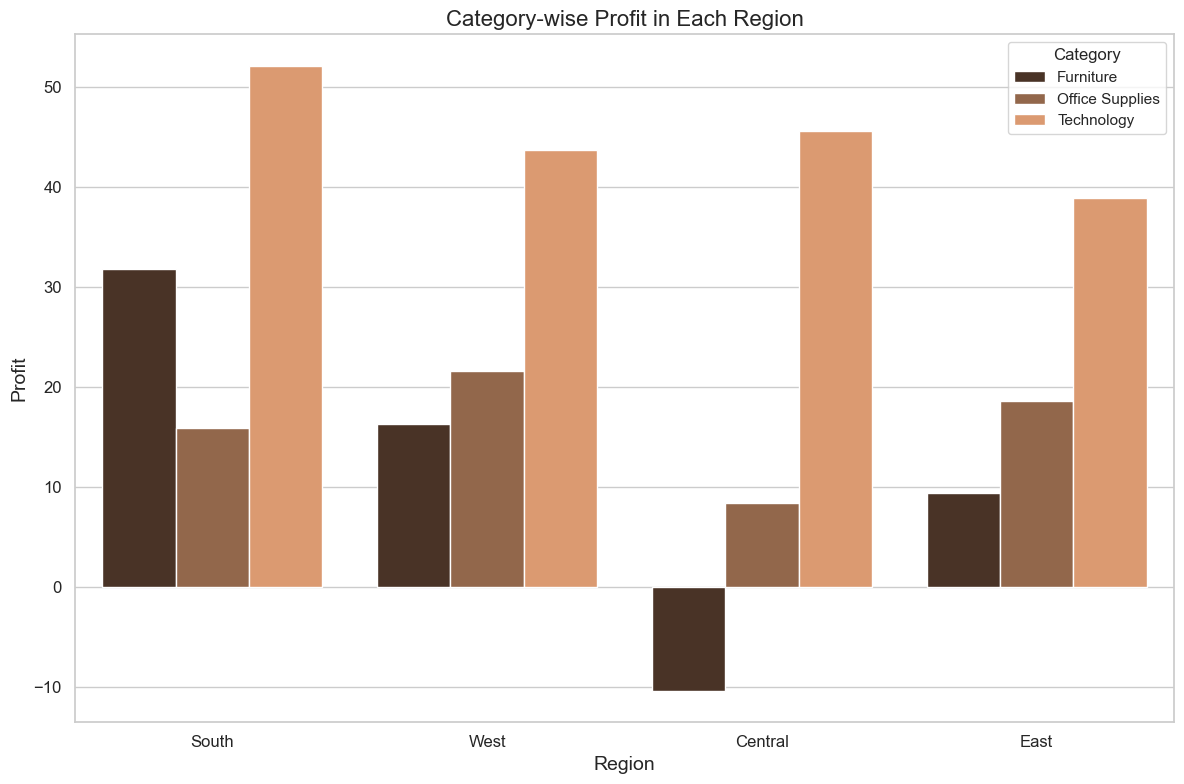

In [45]:
plt.figure(figsize=[12, 8])
sns.set(style="whitegrid")

# Creating a grouped barplot with a stacked layout for Category vs. Profit in Each Region
sns.barplot(x="Region", y="Profit", hue="Category", data=df_cleaned, palette="copper", ci=None)

plt.xlabel("Region", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.title("Category-wise Profit in Each Region", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Category")

plt.tight_layout()
plt.show()

'Technology' consistently leads in generating the highest profit across all regions. On the other hand, 'Furniture' falls behind in all regions except the South region. Notably, in the Central region, 'Furniture' is incurring losses. These findings should be carefully considered and addressed.

In [46]:
fig = px.bar(df_cleaned, x="Sub-Category", y="Profit", title="Subcategory-wise Profit", 
             labels={"Sub-Category": "Subcategory", "Profit": "Profit"},
             color_discrete_sequence=["crimson"])

fig.update_layout(xaxis_title="Subcategory", yaxis_title="Profit")
fig.update_xaxes(tickangle=45)

fig.show()

It's evident that 'Phones' are generating substantial profits, and 'Accessories' are performing well. However, 'Tables' and 'Bookcases' are incurring losses. Appropriate measures should be taken to enhance the business in these subcategories.

### As evident from the data, the highest profit is associated with the 'Technology' category. Therefore, it would be prudent to delve deeper into this category for further exploration and analysis.

In [47]:
df_tech = df_cleaned[df_cleaned['Category'] == "Technology"]

df_tech.head()

Ship Mode    Segment           City       State   Region    Category  \
7   Standard Class   Consumer    Los Angeles  California     West  Technology   
11  Standard Class   Consumer    Los Angeles  California     West  Technology   
19    Second Class   Consumer  San Francisco  California     West  Technology   
26    Second Class   Consumer    Los Angeles  California     West  Technology   
35     First Class  Corporate     Richardson       Texas  Central  Technology   

   Sub-Category     Sales  Quantity  Discount    Profit  
7        Phones   907.152         6       0.2   90.7152  
11       Phones   911.424         4       0.2   68.3568  
19       Phones   213.480         3       0.2   16.0110  
26  Accessories    90.570         3       0.0   11.7741  
35       Phones  1097.544         7       0.2  123.4737

In [48]:
# Creating a bar chart for Subcategory vs. Sales under the 'Technology' category using Plotly
fig = px.bar(df_tech, x="Sub-Category", y="Sales", title="Subcategory-wise Sales in Technology Category",
             labels={"Sub-Category": "Subcategory", "Sales": "Sales"},
             color_discrete_sequence=["darkmagenta"])

fig.update_layout(xaxis_title="Subcategory", yaxis_title="Sales")
fig.update_xaxes(tickangle=90)

fig.show()

Within the 'Technology' category, the subcategory 'Phones' records the highest sales, while 'Copiers' has the lowest sales. Additionally, the subcategory 'Accessories' is also performing well in terms of sales.

In [49]:
# Creating a grouped bar chart for Subcategory vs. Profit under the 'Technology' category using Plotly
fig = px.bar(df_tech, x="Sub-Category", y="Profit", title="Subcategory-wise Profit in Technology Category",
             labels={"Sub-Category": "Subcategory", "Profit": "Profit"},
             color_discrete_sequence=["midnightblue"])

fig.update_layout(xaxis_title="Subcategory", yaxis_title="Profit")
fig.update_xaxes(tickangle=45)

fig.show()

The visualization makes it evident that 'Phones' are indeed generating the highest profit, consistent with the earlier observation. However, 'Machines' are not performing as well in terms of profit, despite their substantial sales figures, as previously noted.

In [50]:
# Creating a grouped bar chart for Subcategory vs. Profit under the 'Technology' category for each region using Plotly
fig = px.bar(df_tech, x="Sub-Category", y="Profit", title="Subcategory-wise Profit in Technology Category by Region",
             labels={"Sub-Category": "Subcategory", "Profit": "Profit"},
             color="Region")

fig.update_layout(xaxis_title="Subcategory", yaxis_title="Profit")
fig.update_xaxes(tickangle=45)

fig.show()

Regarding profit, 'Phones' consistently outperforms other subcategories in every region. 'Machines' generally experiences losses in all regions except the West. The remaining two subcategories maintain an average performance across all regions.

In [51]:
# Creating a grouped bar chart for Subcategory vs. Profit under the 'Technology' category by Ship Mode using Plotly
fig = px.bar(df_tech, x="Sub-Category", y="Profit", title="Subcategory-wise Profit in Technology Category by Ship Mode",
             labels={"Sub-Category": "Subcategory", "Profit": "Profit"},
             color="Ship Mode")

fig.update_layout(xaxis_title="Subcategory", yaxis_title="Profit")
fig.update_xaxes(tickangle=45)

fig.show()

The same pattern is observed here as well. 'Phones' clearly outperforms the other subcategories, while 'Machines' faces challenges, particularly in the 'Second Class' ship mode, where there is a significant consumer count, as previously observed. Therefore, appropriate actions should be considered accordingly.

## Conclusion:

The overall analysis reveals that major cities such as New York, Los Angeles, San Francisco, and Seattle are consistently the top performers, generating the highest sales and profits. Additionally, the Technology category consistently leads in terms of both sales and profit. 

The analysis also highlights some valuable insights, such as cities where the company offers substantial discounts but experiences low sales and profits. Conversely, there are cities where no discounts are provided, yet they generate significant profits. Therefore, it's essential to focus on addressing these observations. 

By addressing the points mentioned above, there is a clear opportunity for improvement and optimization.

### Valuable Insights:

1. The highest profits come from the technology sector, particularly from the Consumer segment.
2. Profits are significantly higher when the ship mode is 'Standard Class' but much lower when it's 'Same Day'.
3. Maintaining a discount level below 0.3 leads to profit, but increasing discounts beyond this threshold results in losses.
4. The furniture section, especially the 'Tables' category, is incurring substantial losses.
5. Profit margins are higher in the East and West regions of the country.
6. New York City generates the highest profits, while the city of Philadelphia experiences significant losses.
7. California is the highest profitable state, whereas Texas faces substantial losses.
8. The Consumer segment has a wider distribution of Superstore's products.

### Suggestions to the Business:

1. Address the significant losses incurred in the furniture category by considering options like discontinuing furniture sales, increasing furniture prices, or reducing overall production costs.

2. Avoid increasing discounts beyond 0.3 to maintain profitability.

3. Consider raising shipping charges for the "Same Day" shipping mode.

4. Focus more on the technology section, which consistently generates higher profits.

5. Expand product sales in the East and West regions, which have shown higher profit margins.